In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-13T20:53:43.352Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8925}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# Displays the max column and not just a few
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951280e+07,1.951280e+07,False,NaN,1,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,26755.268395,1.348674e+10,38.2854,-0.030757,0.076476,-4.378152,2.014398,-8.884099,-11.739215,5.220702e+11,49.9022,5.618606e+11,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
1,1027,Ethereum,ETH,ethereum,7547,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202549e+08,1.202549e+08,True,NaN,2,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,1543.847047,3.789433e+09,-25.7022,-0.062528,0.597276,-6.283638,-3.768777,-16.238448,-20.085085,1.856552e+11,17.7418,1.856552e+11,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
2,825,Tether USDt,USDT,tether,63677,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352203e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,0.999768,1.899428e+10,14.0065,0.006932,0.000879,-0.072537,-0.033755,0.095867,-0.043933,8.350266e+10,7.9810,8.660558e+10,NaN,2023-10-13T20:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-13 09:02:14.917471+00:00
3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538450e+08,1.538450e+08,False,NaN,4,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,205.609425,2.625875e+08,-12.3649,0.101154,0.270548,-3.746993,-3.247063,-14.419755,-18.277775,3.163199e+10,3.0233,3.163199e+10,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,0.484005,6.372259e+08,-21.3269,0.167401,0.433450,-8.135085,-0.043663,-23.104472,-32.693451,2.586573e+10,2.4718,4.840051e+10,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00


In [5]:
# Automating the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df = df.append(df2)

if not os.path.isfile(r'C:\Users\MY PC\Desktop\datasets\API.csv'):
    df.to_csv(r'C:\Users\MY PC\Desktop\datasets\API.csv', header='column_names')

{'status': {'timestamp': '2023-10-13T20:53:57.089Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8925}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\ana\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Kwesil's\AppData\Local\Temp\ipykernel_4696\4108362556.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


NameError: name 'os' is not defined

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19512800.00000,19512800.00000,False,NaN,1,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,26755.26839,13486738506.26839,38.28540,-0.03076,0.07648,-4.37815,2.01440,-8.88410,-11.73922,522070201136.85382,49.90220,561860636293.81006,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
1,1027,Ethereum,ETH,ethereum,7547,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120254931.89747,120254931.89747,True,NaN,2,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,1543.84705,3789433094.37980,-25.70220,-0.06253,0.59728,-6.28364,-3.76878,-16.23845,-20.08509,185655221441.36441,17.74180,185655221441.35999,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
2,825,Tether USDt,USDT,tether,63677,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83522033056.64186,86625667477.82047,True,NaN,3,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,0.99977,18994280589.48311,14.00650,0.00693,0.00088,-0.07254,-0.03375,0.09587,-0.04393,83502660616.69713,7.98100,86605575168.28999,NaN,2023-10-13T20:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-13 09:02:14.917471+00:00
3,1839,BNB,BNB,bnb,1679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845016.42146,153845016.42146,False,NaN,4,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,205.60943,262587451.68359,-12.36490,0.10115,0.27055,-3.74699,-3.24706,-14.41975,-18.27778,31631985438.03183,3.02330,31631985438.03000,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,0.48401,637225881.05829,-21.32690,0.16740,0.43345,-8.13509,-0.04366,-23.10447,-32.69345,25865730535.78729,2.47180,48400511371.03000,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
5,3408,USDC,USDC,usd-coin,14439,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25113807792.16513,25113807792.16513,False,NaN,6,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,1.00013,1931506668.93398,-20.80930,0.00276,-0.00139,0.00930,-0.00041,0.00945,0.02142,25117077289.55337,2.40030,25117077289.55000,NaN,2023-10-13T20:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-13 09:02:14.917471+00:00
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416121665.46209,559858407.72576,True,NaN,7,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,21.64842,203618869.91349,-27.01430,0.44555,2.10165,-7.59670,17.87760,-12.93214,-21.89506,9008375270.38424,0.86090,12120048182.24000,NaN,2023-10-13T20:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-13 09:02:14.917471+00:00
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35208439711.45700,36259372926.66300,False,NaN,8,NaN,NaN,NaN,2023-10-13T20:51:00.000Z,0.24608,86354783.51344,-2.55560,0.00819,0.64966,-7.40178,-1.02006,-15.21045,-25.02836,8663957815.41161,0.82810,11073427419.35000,Na

In [8]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03076,0.07648,-4.37815,2.01440,-8.88410,-11.73922
Ethereum,-0.06253,0.59728,-6.28364,-3.76878,-16.23845,-20.08509
Tether USDt,0.00693,0.00088,-0.07254,-0.03375,0.09587,-0.04393
BNB,0.10115,0.27055,-3.74699,-3.24706,-14.41975,-18.27778
XRP,0.16740,0.43345,-8.13509,-0.04366,-23.10447,-32.69345
USDC,0.00276,-0.00139,0.00930,-0.00041,0.00945,0.02142
Solana,0.44555,2.10165,-7.59670,17.87760,-12.93214,-21.89506
Cardano,0.00819,0.64966,-7.40178,-1.02006,-15.21045,-25.02836
Dogecoin,0.03338,0.62997,-5.24324,-4.93186,-21.59407,-19.85751


In [9]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.03076
                   quote.USD.percent_change_24h     0.07648
                   quote.USD.percent_change_7d     -4.37815
                   quote.USD.percent_change_30d     2.01440
                   quote.USD.percent_change_60d    -8.88410
                   quote.USD.percent_change_90d   -11.73922
Ethereum           quote.USD.percent_change_1h     -0.06253
                   quote.USD.percent_change_24h     0.59728
                   quote.USD.percent_change_7d     -6.28364
                   quote.USD.percent_change_30d    -3.76878
                   quote.USD.percent_change_60d   -16.23845
                   quote.USD.percent_change_90d   -20.08509
Tether USDt        quote.USD.percent_change_1h      0.00693
                   quote.USD.percent_change_24h     0.00088
                   quote.USD.percent_change_7d     -0.07254
                   quote.USD.percent_change_30d    -

In [10]:
type(df4)

pandas.core.series.Series

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.03076
                  quote.USD.percent_change_24h   0.07648
                  quote.USD.percent_change_7d   -4.37815
                  quote.USD.percent_change_30d   2.01440
                  quote.USD.percent_change_60d  -8.88410
                  quote.USD.percent_change_90d -11.73922
Ethereum          quote.USD.percent_change_1h   -0.06253
                  quote.USD.percent_change_24h   0.59728
                  quote.USD.percent_change_7d   -6.28364
                  quote.USD.percent_change_30d  -3.76878
                  quote.USD.percent_change_60d -16.23845
                  quote.USD.percent_change_90d -20.08509
Tether USDt       quote.USD.percent_change_1h    0.00693
                  quote.USD.percent_change_24h   0.00088
                  quote.USD.percent_change_7d   -0.07254
                  quote.USD.percent_change_30d  -0.03375
                  quote.USD.percent_change_60d   0.09587
                  quote.USD.percent_change_90d  -0.04393
BNB               quote.USD.percent_change_1h    0.10115
                  quote.USD.percent_change_24h   0.27055
                  quote.USD.percent_change_7d   -3.74699
                  quote.USD.percent_change_30d  -3.24706
                  quote.USD.percent_change_60d -14.41975
                  quote.USD.percent_change_90d -18.27778
XRP               quote.USD.percent_change_1h    0.16740
                  quote.USD.percent_change_24h   0.43345
                  quote.USD.percent_change_7d   -8.13509
                  quote.USD.percent_change_30d  -0.04366
                  quote.USD.percent_change_60d -23.10447
                  quote.USD.percent_change_90d -32.69345
USDC              quote.USD.percent_change_1h    0.00276
                  quote.USD.percent_change_24h  -0.00139
                  quote.USD.percent_change_7d    0.00930
                  quote.USD.percent_change_30d  -0.00041
                  quote.USD.percent_change_60d   0.00945
                  quote.USD.percent_change_90d   0.02142
Solana            quote.USD.percent_change_1h    0.44555
                  quote.USD.percent_change_24h   2.10165
                  quote.USD.percent_change_7d   -7.59670
                  quote.USD.percent_change_30d  17.87760
                  quote.USD.percent_change_60d -12.93214
                  quote.USD.percent_change_90d -21.89506
Cardano           quote.USD.percent_change_1h    0.00819
                  quote.USD.percent_change_24h   0.64966
                  quote.USD.percent_change_7d   -7.40178
                  quote.USD.percent_change_30d  -1.02006
                  quote.USD.percent_change_60d -15.21045
                  quote.USD.percent_change_90d -25.02836
Dogecoin          quote.USD.percent_change_1h    0.03338
                  quote.USD.percent_change_24h   0.62997
                  quote.USD.percent_change_7d   -5.24324
                  quote.USD.percent_change_30d  -4.93186
                  quote.USD.percent_change_60d -21.59407
                  quote.USD.percent_change_90d -19.85751
TRON              quote.USD.percent_change_1h   -0.02494
                  quote.USD.percent_change_24h  -0.01786
                  quote.USD.percent_change_7d   -2.34842
                  quote.USD.percent_change_30d   5.03594
                  quote.USD.percent_change_60d   9.92524
                  quote.USD.percent_change_90d   5.30133
Toncoin           quote.USD.percent_change_1h    0.02035
                  quote.USD.percent_change_24h   0.91598
                  quote.USD.percent_change_7d   -9.76951
                  quote.USD.percent_change_30d   4.33113
                  quote.USD.percent_change_60d  34.46346
                  quote.USD.percent_change_90d  44.05217
Dai               quote.USD.percent_change_1h    0.01111
                  quote.USD.percent_change_24h   0.02032
                  quote.USD.percent_change_7d    0.00215
   

In [12]:
df5.count()

values    300
dtype: int64

In [13]:
index = pd.Index(range(300))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03076
1,Bitcoin,quote.USD.percent_change_24h,0.07648
2,Bitcoin,quote.USD.percent_change_7d,-4.37815
3,Bitcoin,quote.USD.percent_change_30d,2.01440
4,Bitcoin,quote.USD.percent_change_60d,-8.88410
5,Bitcoin,quote.USD.percent_change_90d,-11.73922
6,Ethereum,quote.USD.percent_change_1h,-0.06253
7,Ethereum,quote.USD.percent_change_24h,0.59728
8,Ethereum,quote.USD.percent_change_7d,-6.28364
9,Ethereum,quote.USD.percent_change_30d,-3.76878


In [14]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03076
1,Bitcoin,quote.USD.percent_change_24h,0.07648
2,Bitcoin,quote.USD.percent_change_7d,-4.37815
3,Bitcoin,quote.USD.percent_change_30d,2.01440
4,Bitcoin,quote.USD.percent_change_60d,-8.88410
5,Bitcoin,quote.USD.percent_change_90d,-11.73922
6,Ethereum,quote.USD.percent_change_1h,-0.06253
7,Ethereum,quote.USD.percent_change_24h,0.59728
8,Ethereum,quote.USD.percent_change_7d,-6.28364
9,Ethereum,quote.USD.percent_change_30d,-3.76878


In [15]:
df7['percent_change'] = df7['percent_change'].replace('quote.USD.percent_change_', '', regex=True)
df7.head(30)

,name,percent_change,values
0,Bitcoin,1h,-0.03076
1,Bitcoin,24h,0.07648
2,Bitcoin,7d,-4.37815
3,Bitcoin,30d,2.01440
4,Bitcoin,60d,-8.88410
5,Bitcoin,90d,-11.73922
6,Ethereum,1h,-0.06253
7,Ethereum,24h,0.59728
8,Ethereum,7d,-6.28364
9,Ethereum,30d,-3.76878


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

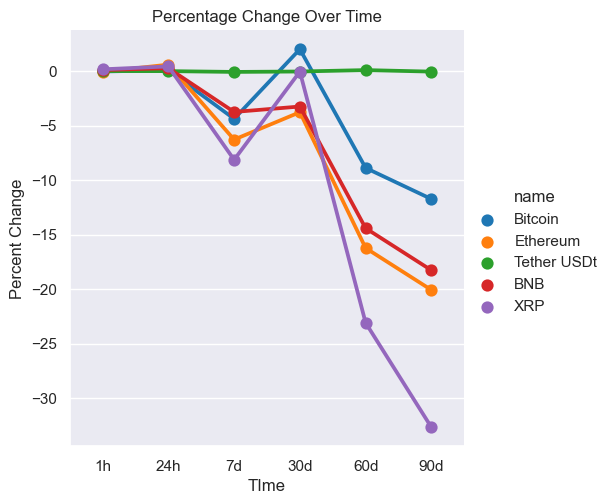

In [17]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("tab10", n_colors=10)
sns.catplot(x='percent_change', 
            y='values', hue='name', 
            data=df7.head(30), kind='point', palette=palette)
plt.title('Percentage Change Over Time')
plt.xlabel("TIme")
plt.ylabel("Percent Change")
plt.show()

In [18]:
# Top 10 cryptocurrency based on market price
top_10_cryptocurrency = df[["name", "symbol", 
                            "last_updated", 
                            "quote.USD.price", "quote.USD.volume_24h"]]
top_10_cryptocurrency = top_10_cryptocurrency.sort_values("quote.USD.price", ascending=False)
top_10_cryptocurrency.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
15,Wrapped Bitcoin,WBTC,2023-10-13T20:51:00.000Z,26760.76491,34327757.11417
15,Wrapped Bitcoin,WBTC,2023-10-13T20:51:00.000Z,26760.76491,34327757.11417
0,Bitcoin,BTC,2023-10-13T20:51:00.000Z,26755.26839,13486738506.26839
0,Bitcoin,BTC,2023-10-13T20:51:00.000Z,26755.26839,13486738506.26839
1,Ethereum,ETH,2023-10-13T20:51:00.000Z,1543.84705,3789433094.37980
1,Ethereum,ETH,2023-10-13T20:51:00.000Z,1543.84705,3789433094.37980
31,Maker,MKR,2023-10-13T20:51:00.000Z,1431.02147,50915509.51101
31,Maker,MKR,2023-10-13T20:51:00.000Z,1431.02147,50915509.51101
16,Bitcoin Cash,BCH,2023-10-13T20:51:00.000Z,215.27073,119521807.31074
16,Bitcoin Cash,BCH,2023-10-13T20:51:00.000Z,215.27073,119521807.31074


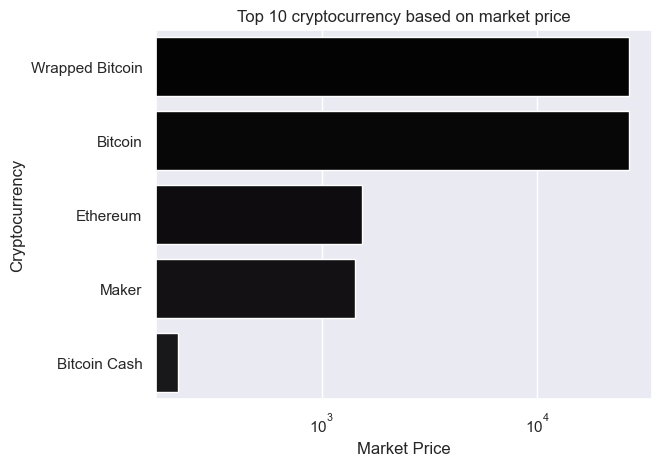

In [19]:
cpal=sns.color_palette("cubehelix",n_colors=64,desat=0.2)
sns.barplot(x="quote.USD.price", 
            y="name",
            data=top_10_cryptocurrency.head(10),
            orient="h",
            palette=cpal)
plt.title('Top 10 cryptocurrency based on market price')
plt.xlabel('Market Price')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()

In [20]:
# Top 10 cryptocurrency based on 24 hour volume
top_10_cryptocurrency_volume = top_10_cryptocurrency.sort_values("quote.USD.volume_24h", ascending=False)
top_10_cryptocurrency_volume.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
2,Tether USDt,USDT,2023-10-13T20:51:00.000Z,0.99977,18994280589.48311
2,Tether USDt,USDT,2023-10-13T20:51:00.000Z,0.99977,18994280589.48311
0,Bitcoin,BTC,2023-10-13T20:51:00.000Z,26755.26839,13486738506.26839
0,Bitcoin,BTC,2023-10-13T20:51:00.000Z,26755.26839,13486738506.26839
1,Ethereum,ETH,2023-10-13T20:51:00.000Z,1543.84705,3789433094.37980
1,Ethereum,ETH,2023-10-13T20:51:00.000Z,1543.84705,3789433094.37980
5,USDC,USDC,2023-10-13T20:51:00.000Z,1.00013,1931506668.93398
5,USDC,USDC,2023-10-13T20:51:00.000Z,1.00013,1931506668.93398
4,XRP,XRP,2023-10-13T20:51:00.000Z,0.48401,637225881.05829
4,XRP,XRP,2023-10-13T20:51:00.000Z,0.48401,637225881.05829


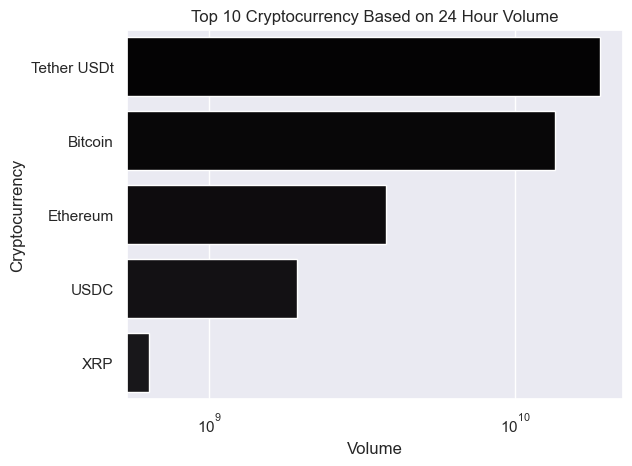

In [21]:
sns.barplot(x="quote.USD.volume_24h", 
            y="name",
            data=top_10_cryptocurrency_volume.head(10),
            orient="h", palette=cpal
            )
plt.title('Top 10 Cryptocurrency Based on 24 Hour Volume')
plt.xlabel('Volume')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()